# Compare dT distributions with/without pileup

I want to investigate the correct dT cut 

In [3]:
import sys
sys.path.extend(["../../src/core", "../../src/utils"])
from draw import Draw
from io_manager import Load
from analyse import Analyse
from pyutils.pyplot import Plot
from pyutils.pyselect import Select
from pyutils.pyvector import Vector
from pyutils.pyprint import Print

import awkward as ak
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [4]:
events = {}
events["pure"] = Load(in_path = f"../../output/results/dev_CRY_onspill-LH_aw_noCRV").load_pkl()["events"] 
events["pileup"] = Load(in_path = f"../../output/results/dev_CRY_mix2BB_onspill-LH_aw_noCRV").load_pkl()["events"]

[Load] ✅ Initialised with out_path=../../output/results/dev_CRY_onspill-LH_aw_noCRV
[Load] ✅ Successfully loaded results from ../../output/results/dev_CRY_onspill-LH_aw_noCRV/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/dev_CRY_mix2BB_onspill-LH_aw_noCRV
[Load] ✅ Successfully loaded results from ../../output/results/dev_CRY_mix2BB_onspill-LH_aw_noCRV/results.pkl


In [6]:
# printer = Print()
# printer.print_n_events(events["pure"], 1)

In [7]:
plotter = Plot()
out_path = Path("../../output/images/comp/dT")
out_path.mkdir(parents=True, exist_ok=True)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


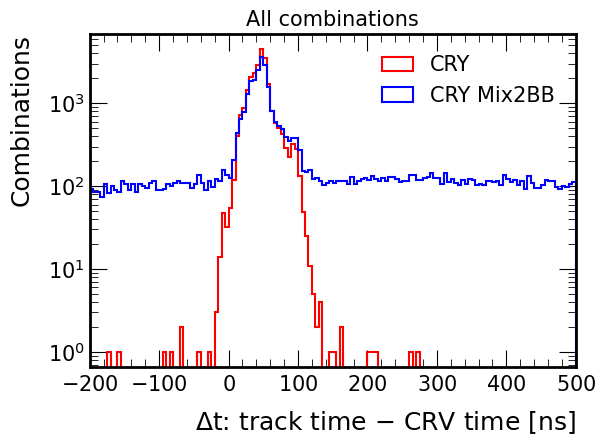

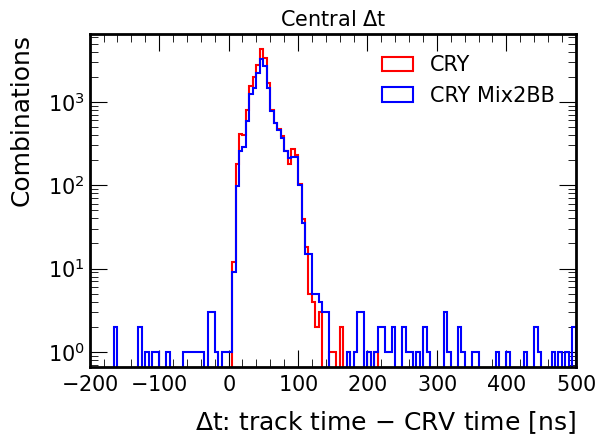

In [13]:
plotter = Plot()
plotter.plot_1D_overlay( 
    {
        "CRY": ak.flatten(events["pure"]["dev"]["dT"], axis=None),
        "CRY Mix2BB": ak.flatten(events["pileup"]["dev"]["dT"], axis=None),
    },
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"All combinations",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=True,
    log_y=True
)
plotter.plot_1D_overlay( 
    {
        "CRY": ak.flatten(events["pure"]["dev"]["cent_dT"], axis=None),
        "CRY Mix2BB": ak.flatten(events["pileup"]["dev"]["cent_dT"], axis=None),
    },
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"Central $\Delta t$",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=True,
    log_y=True
)